# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# Loading Of The Dataset

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.shape

(1599, 12)

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 # Data Analysis and Visulaization

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


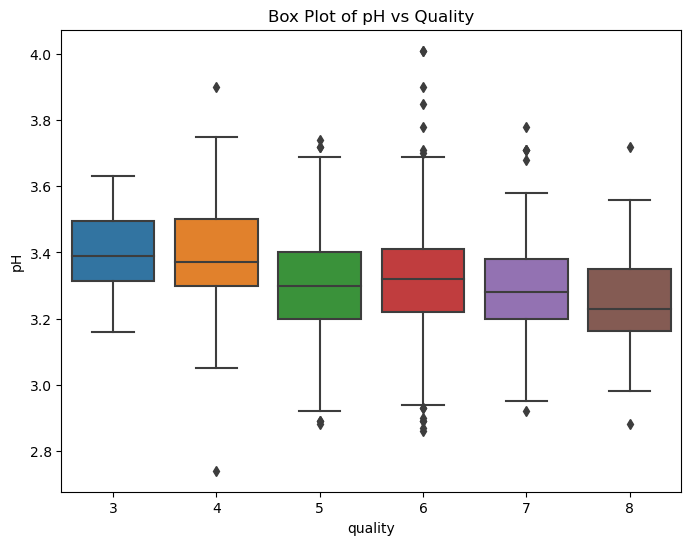

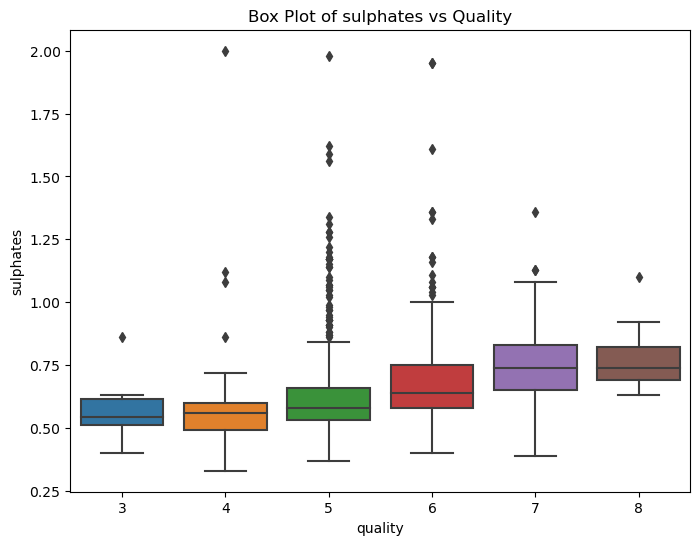

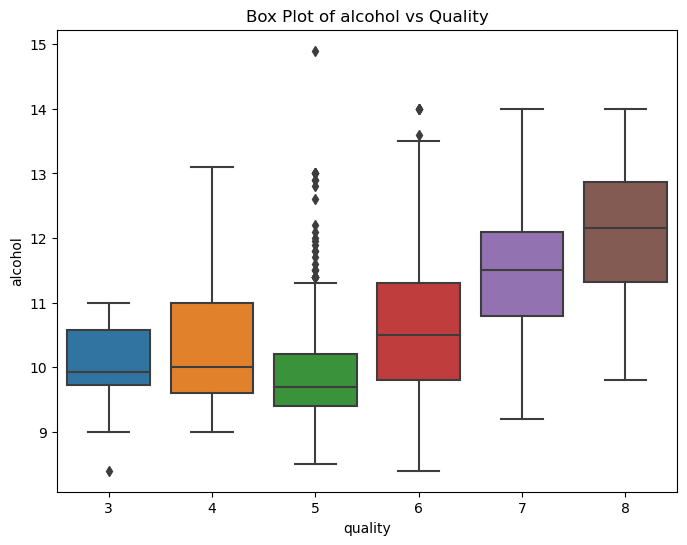

In [8]:
# Box Plots
box_plot_features = ['pH', 'sulphates', 'alcohol']
for feature in box_plot_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=data)
    plt.title(f'Box Plot of {feature} vs Quality')
    plt.show()

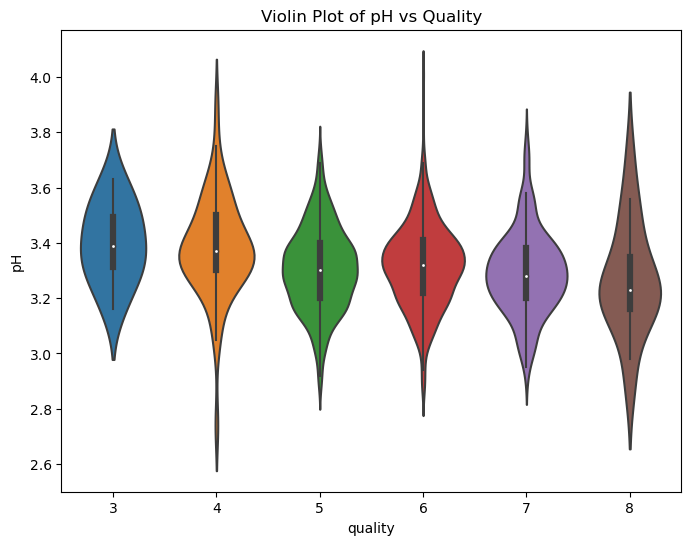

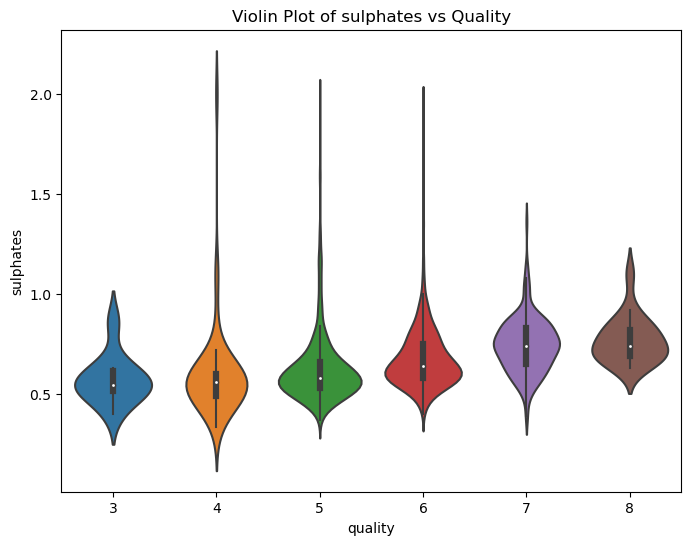

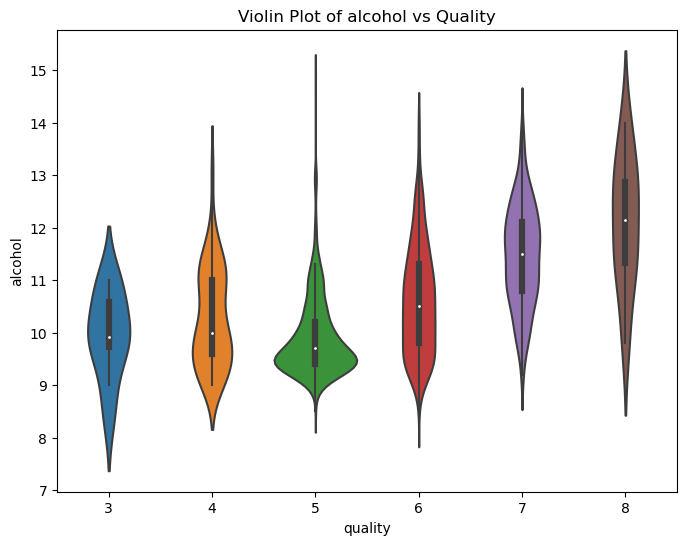

In [20]:
# Violin Plots
for feature in box_plot_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='quality', y=feature, data=data)
    plt.title(f'Violin Plot of {feature} vs Quality')
    plt.show()

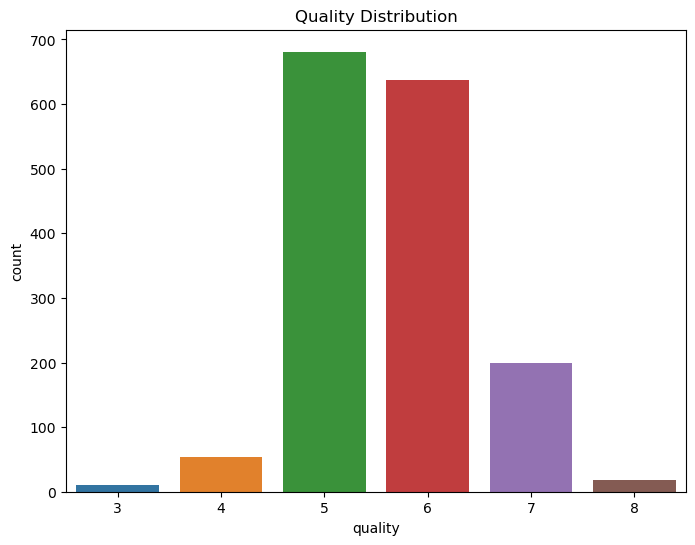

In [9]:
# Bar Plot for Quality Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Quality Distribution')
plt.show()

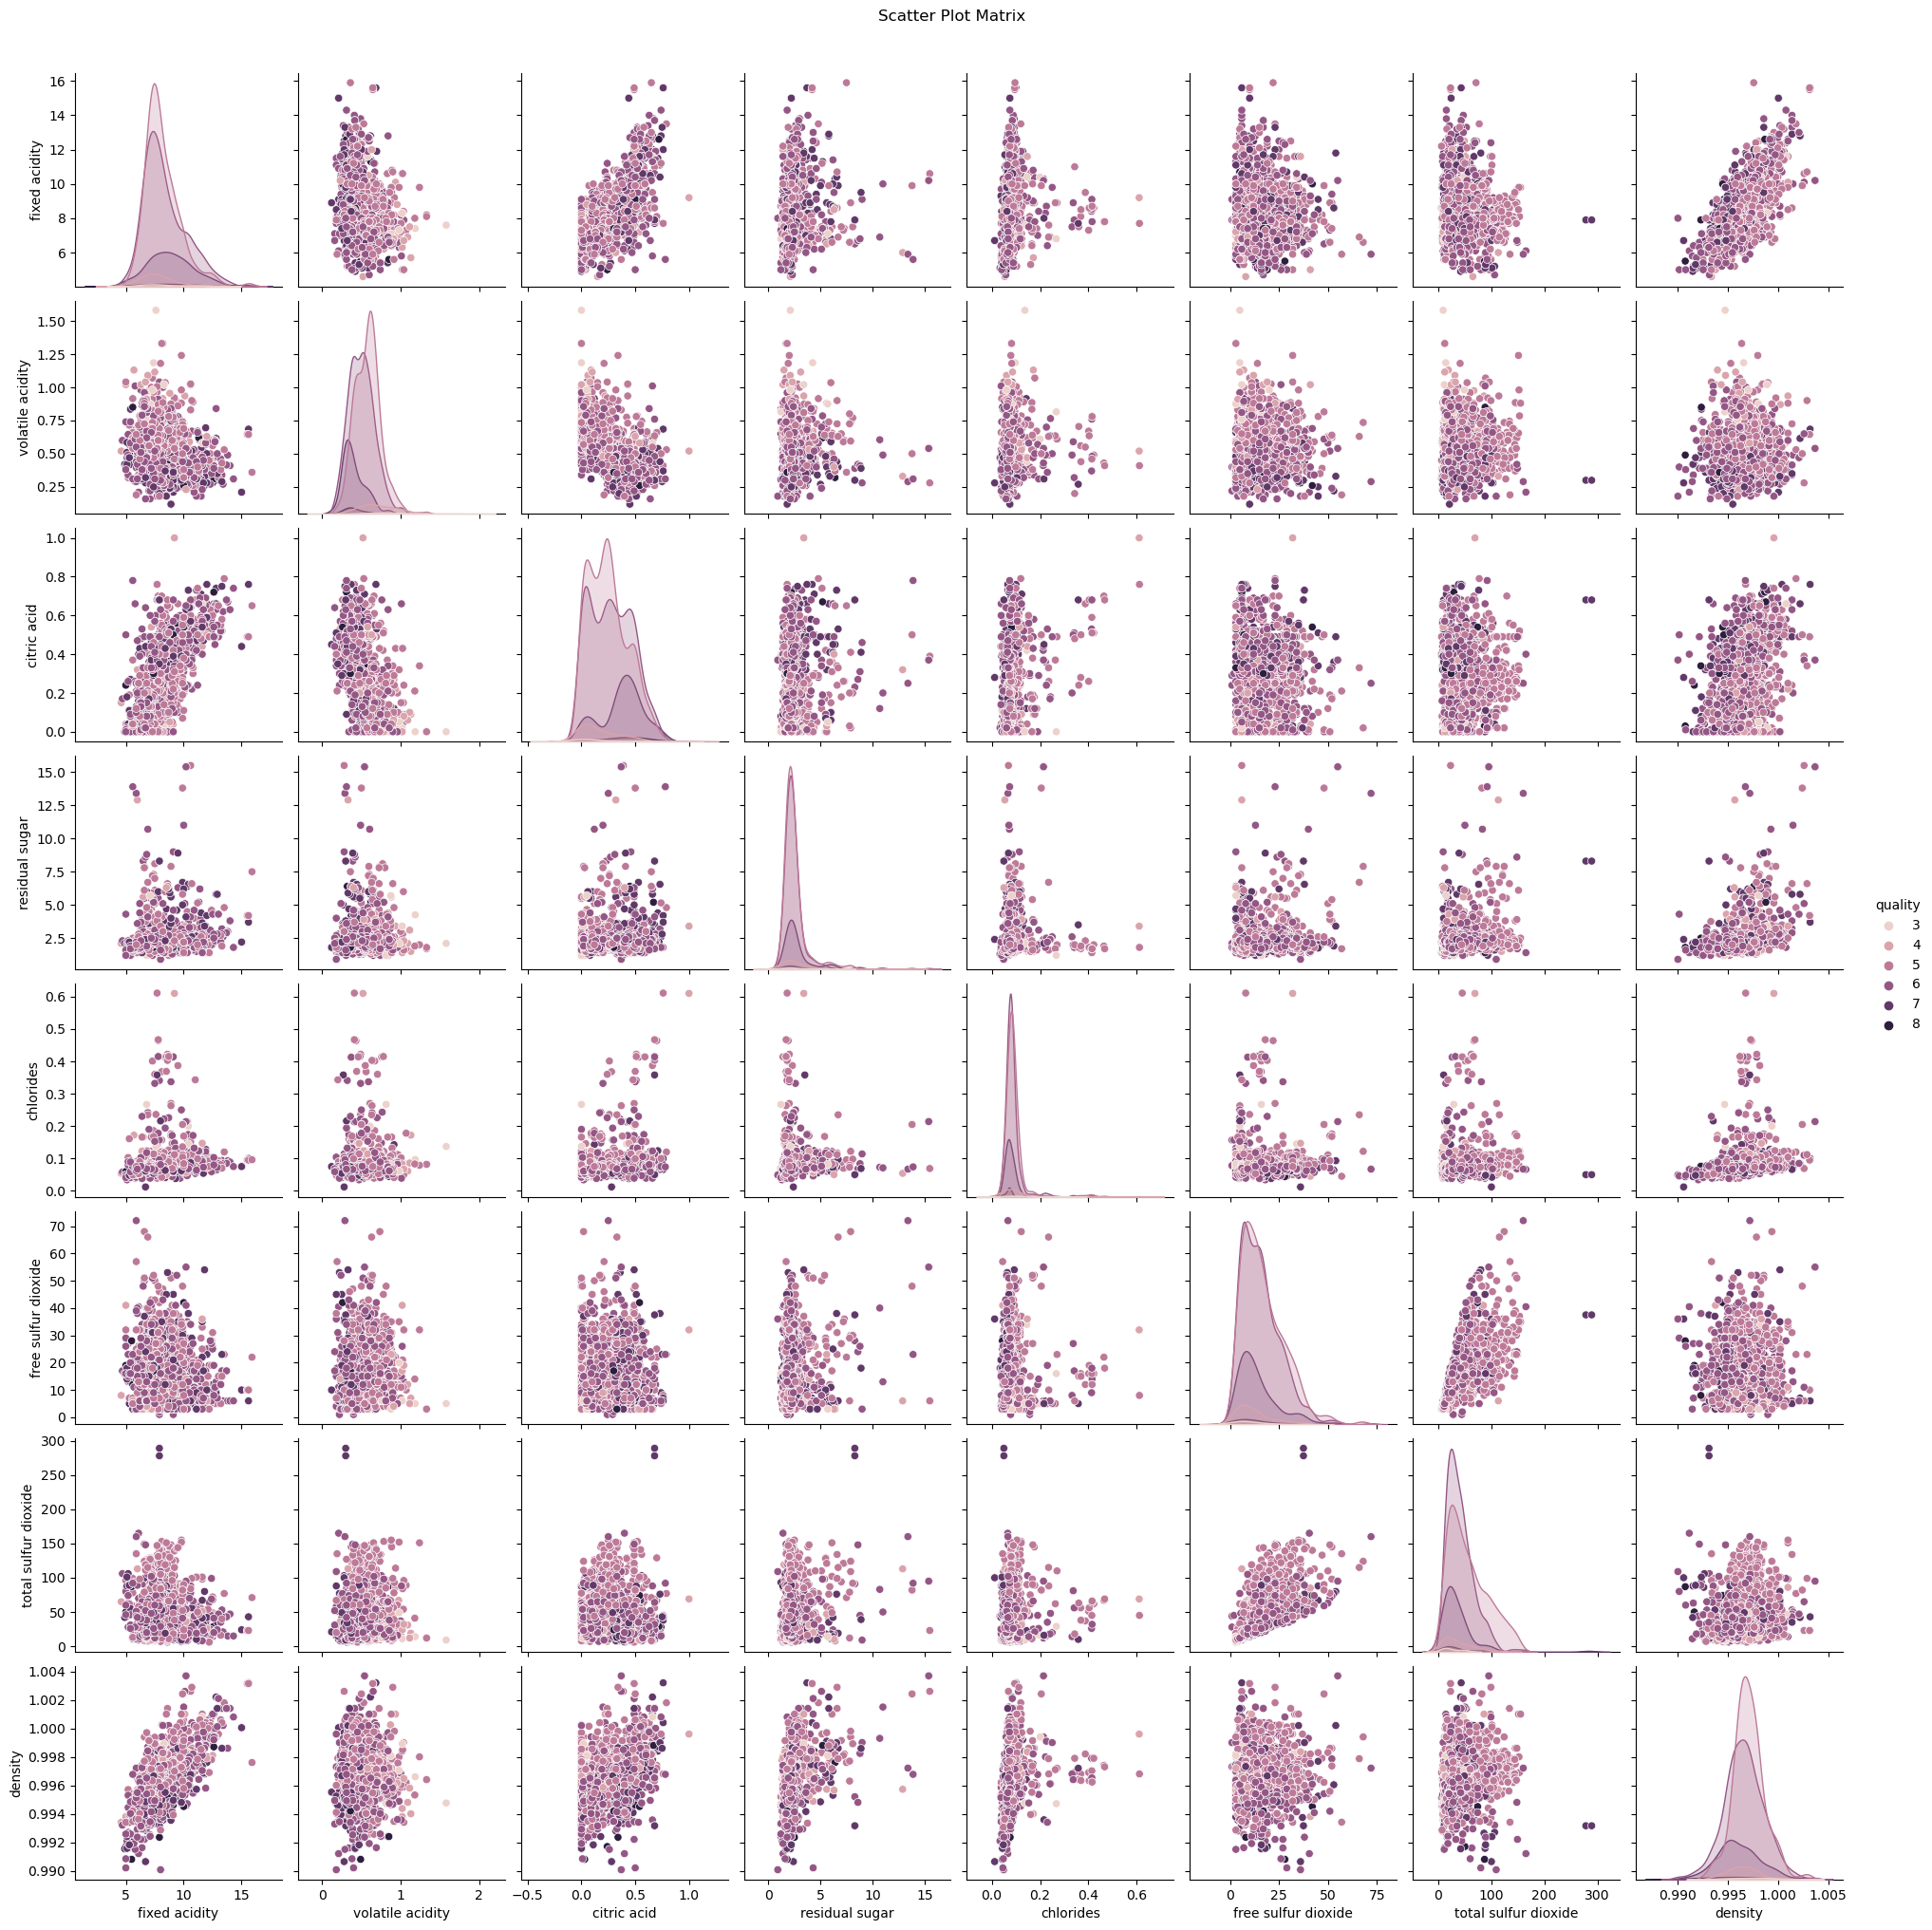

In [18]:
# Scatter Plot Matrix
scatter_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
sns.pairplot(data, vars=scatter_features, hue='quality', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()


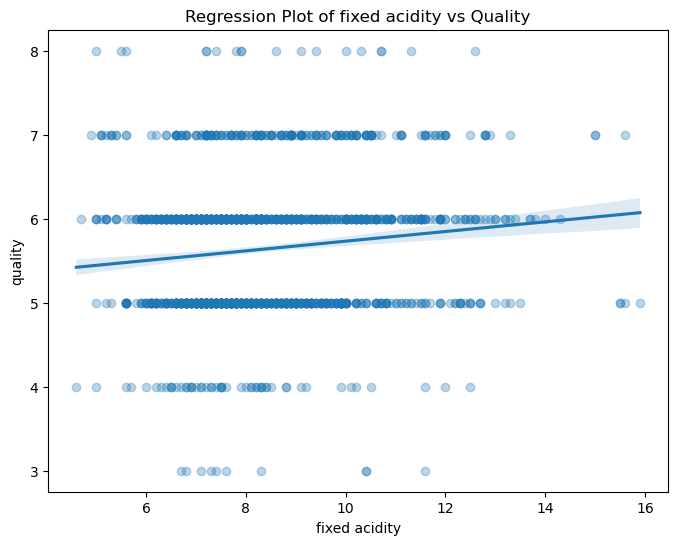

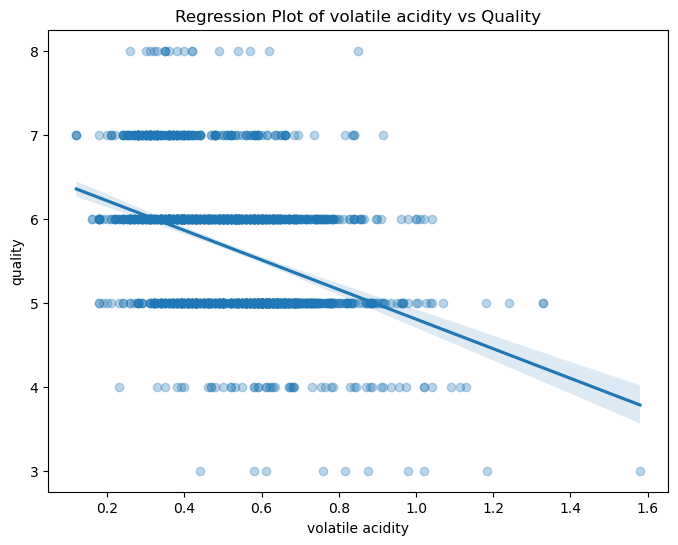

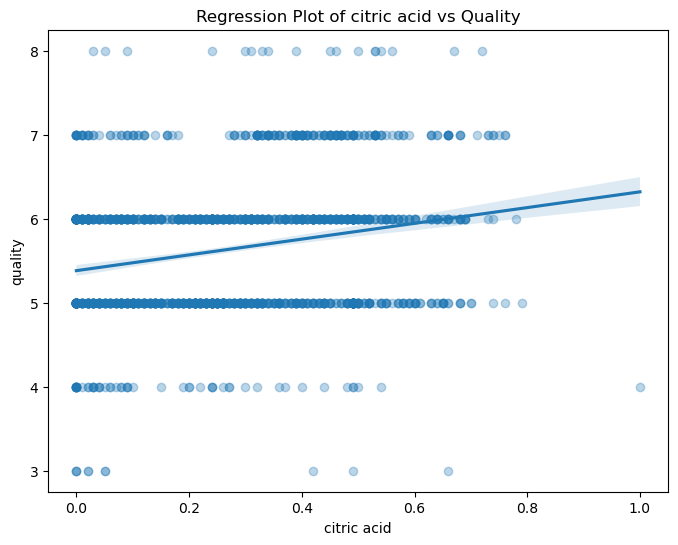

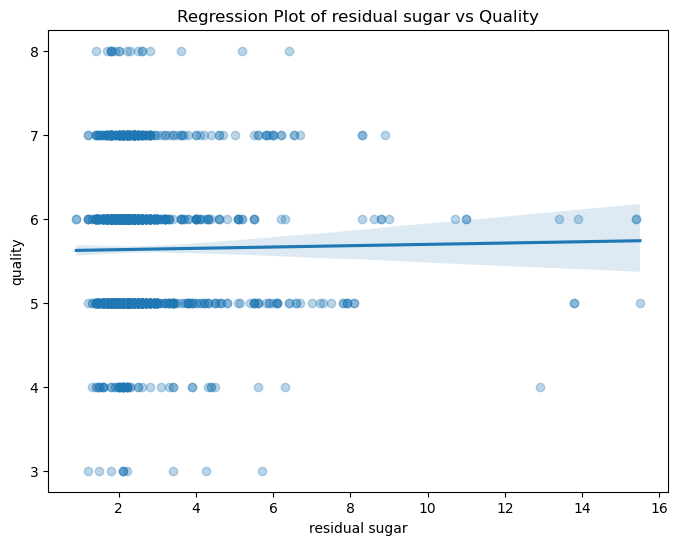

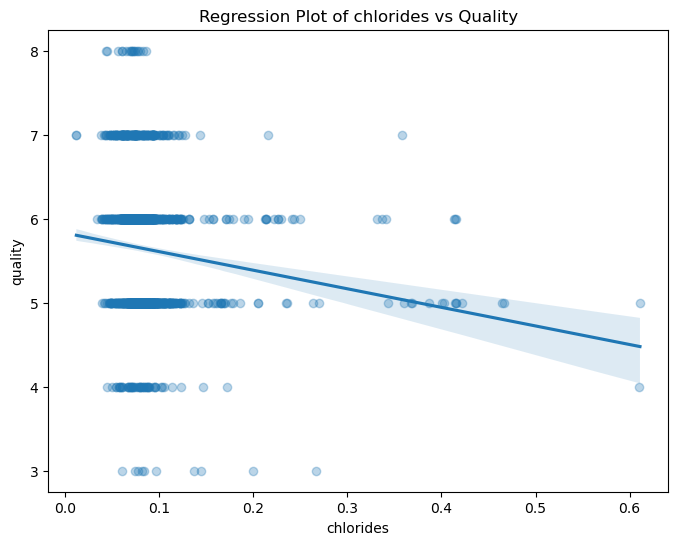

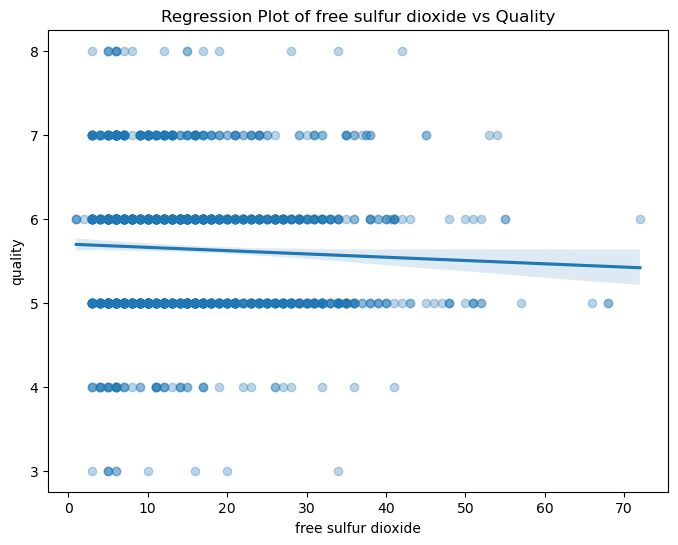

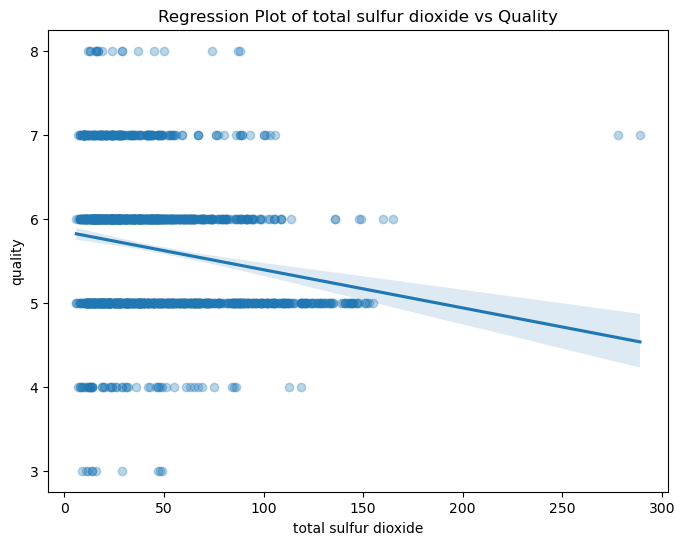

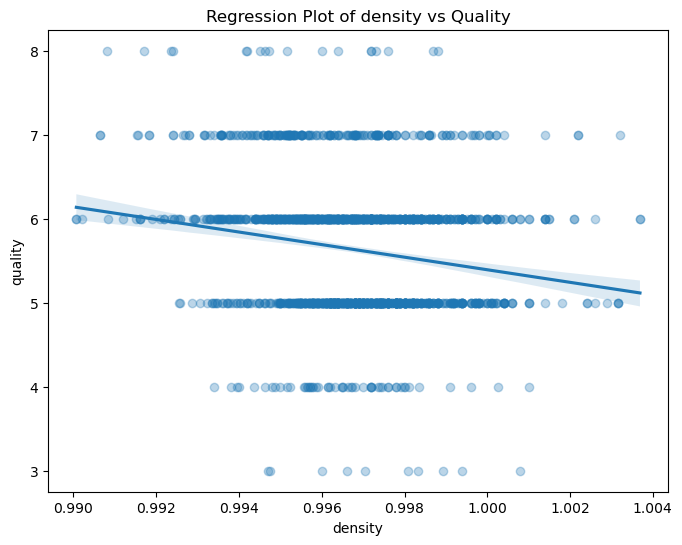

In [19]:
# Regression Plot
for feature in scatter_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y='quality', data=data, scatter_kws={'alpha':0.3})
    plt.title(f'Regression Plot of {feature} vs Quality')
    plt.show()

<Axes: >

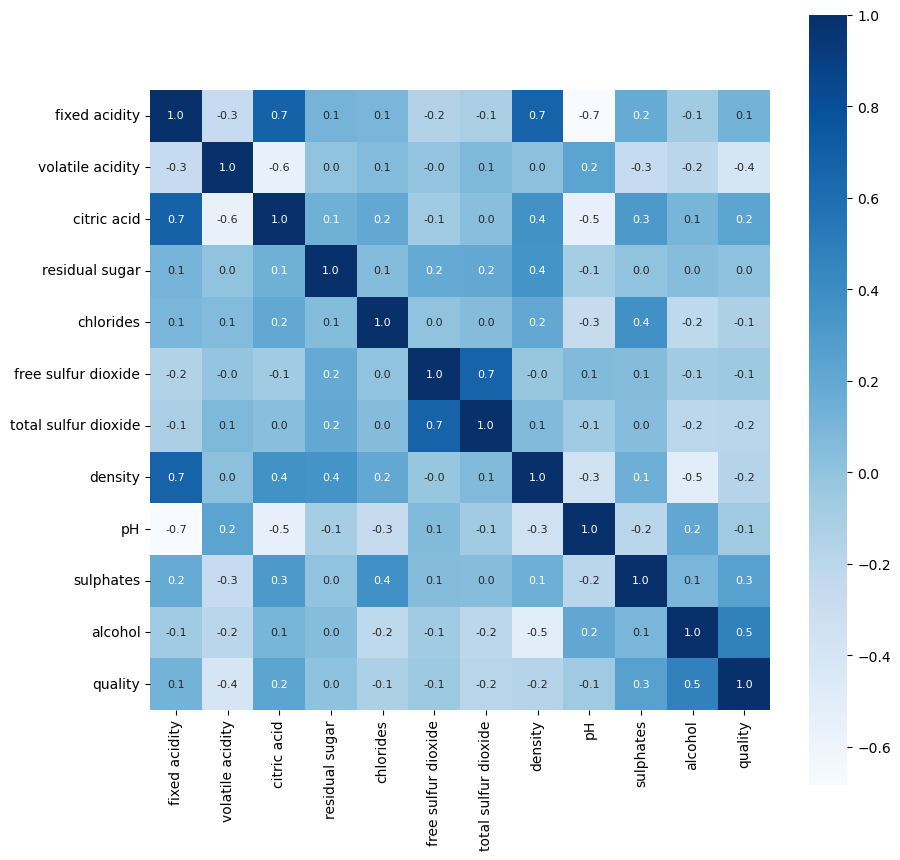

In [11]:
correlation = data.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

# Model Building

In [22]:
# Define the target variable Y
Y = data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

# Define the feature matrix X (excluding the 'quality' column)
X = data.drop('quality', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Create and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=3)
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.93


# Testing and Evaluation Of The Model

In [23]:
new_input_data = [8.0, 0.6, 0.35, 7.2, 0.065, 20.0, 120.0, 0.998, 3.25, 0.7, 11.2]

# Convert new input data to a numpy array and reshape
new_input_data_as_numpy_array = np.asarray(new_input_data)
new_input_data_reshaped = new_input_data_as_numpy_array.reshape(1, -1)

# Predict using the model for the new input data
new_prediction = model.predict(new_input_data_reshaped)

# Print the prediction result for the new input data
if new_prediction[0] == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Bad Quality Wine
